In [85]:
####Given the dataset conataing hours fo study and the scores achieved prediction model has to be built. 
#####Predict how would the score be if the student studies for 9.25 hrs/day.
######Data modelling done and predicted using ensemble techniques(boosting.)

In [1]:
import pandas as pd 

In [11]:
####importing the file
df=pd.read_csv('tsf_task1.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
###As it can be seen that there are only 2 variables and one is the target value and both are numerical values 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
## As it can be seen there is slight differnce in the mean and the standard deviation.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

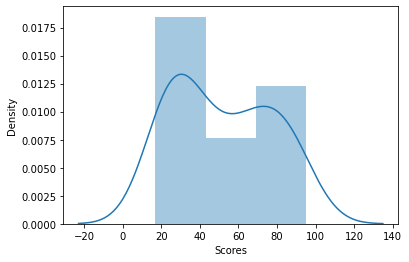

In [23]:
sns.distplot(df['Scores'])

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

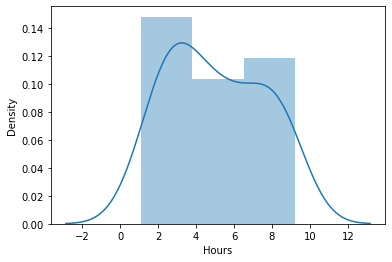

In [24]:
sns.distplot(df['Hours'])

As it can be seen there is skkewness in the dataset.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

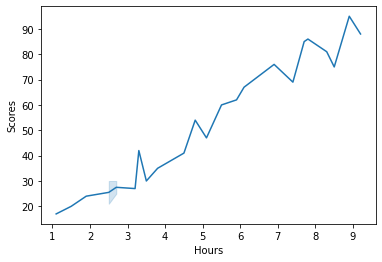

In [28]:
sns.lineplot(x='Hours', y='Scores', data= df)

In [29]:
###There is a linear relationship between nthe the columns in the dataset.

Text(0.5, 0, "['Hours']")

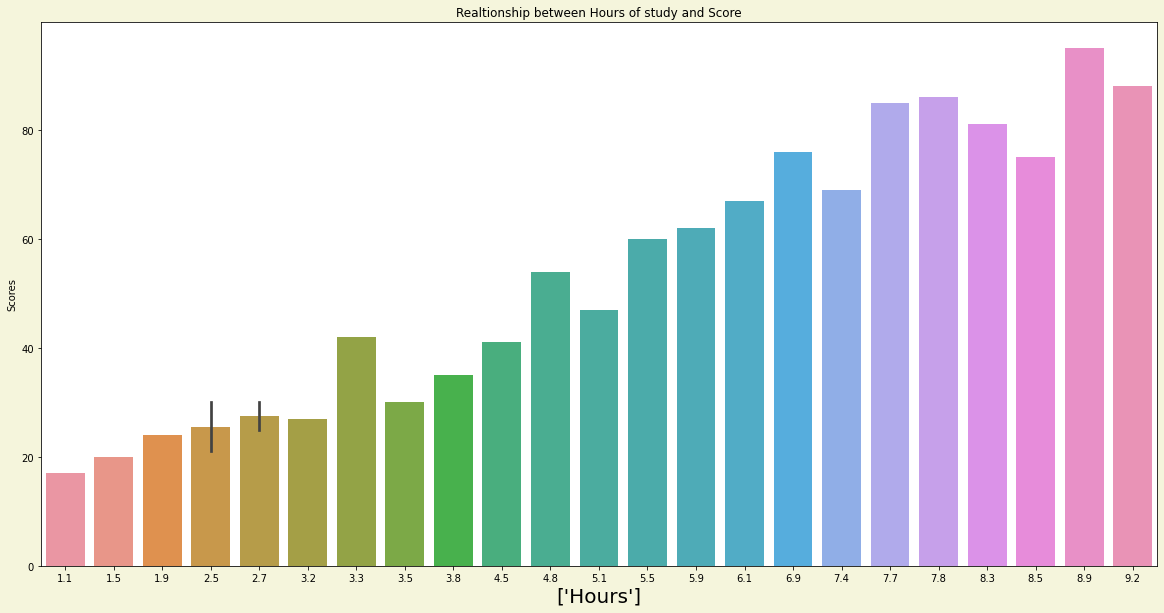

In [38]:
plt.figure(figsize=(20,10),facecolor='beige')
sns.barplot(x='Hours', y='Scores', data= df).set_title('Realtionship between Hours of study and Score')
plt.xlabel(['Hours'],fontsize=20)

2.7    2
2.5    2
5.1    1
3.3    1
6.9    1
3.2    1
6.1    1
7.4    1
7.8    1
8.3    1
4.5    1
7.7    1
1.1    1
3.8    1
3.5    1
8.9    1
1.9    1
5.9    1
4.8    1
8.5    1
5.5    1
9.2    1
1.5    1
Name: Hours, dtype: int64

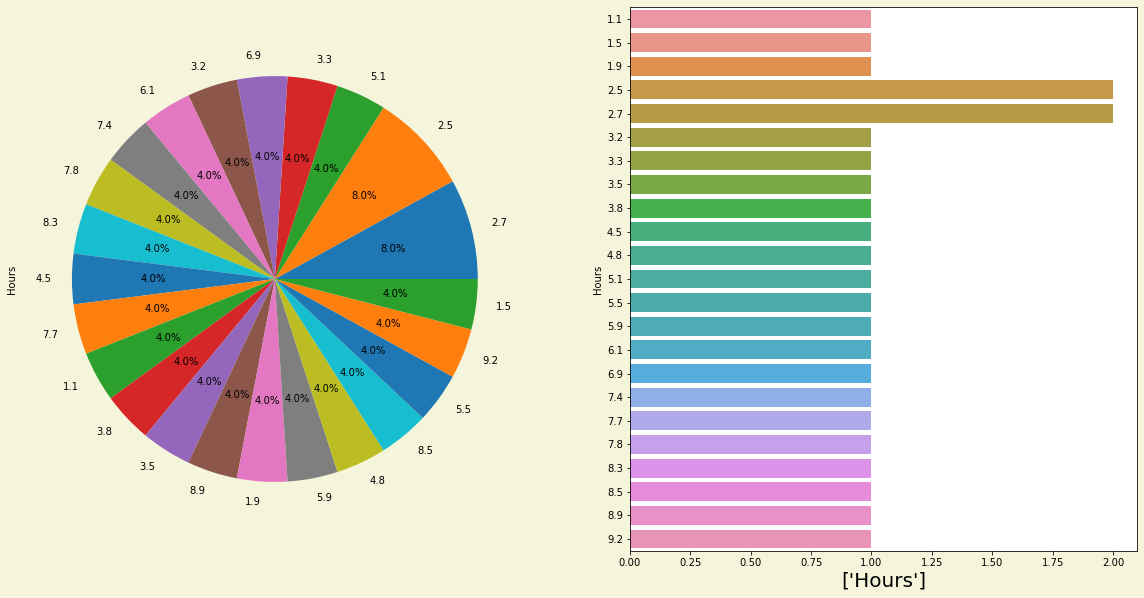

In [39]:
plt.figure(figsize=(20,10),facecolor='beige')
plt.subplot(1,2,1)
df['Hours'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y=df['Hours'])
plt.xlabel(['Hours'],fontsize=20)
df['Hours'].value_counts()

In [36]:
df['Hours'].skew()

0.1903382010052985

In [31]:
df['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
##seperating the data into x and y
y=df['Scores']
x=df.drop(['Scores'], axis=1)


In [49]:
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(25, 1)

In [51]:
##Using the hold_out_method we will spllit into train_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

R Square Score of ln: 0.9418250389075631


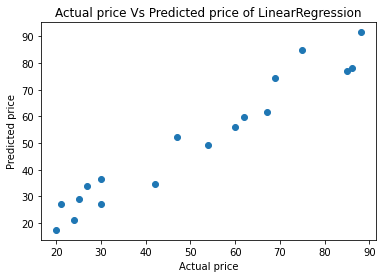

In [57]:
#Model Training:
ln = LinearRegression()
ln.fit(x_train,y_train)
#Model Prediction with trained data:
y_ln_pred = ln.predict(x_train)
print("R Square Score of ln:",r2_score(y_train,y_ln_pred))
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_ln_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of LinearRegression')
plt.show()

In [58]:
# Predicting test data with model:
y_test_ln_pred =ln.predict(x_test)
ln_accuracy = r2_score(y_test,y_test_ln_pred)
print("R Square Score of Linear Regressor:",ln_accuracy)
print('Accuracy of ln :',ln_accuracy*100)
print ('mean absolute error of Linear Regressor is: ',mean_absolute_error(y_test,y_test_ln_pred))
print ('mean squared error of Linear Regressor is: ',mean_squared_error(y_test,y_test_ln_pred))
print ('Root mean squared error of Linear Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_ln_pred)))

R Square Score of Linear Regressor: 0.9722683933217483
Accuracy of ln : 97.22683933217483
mean absolute error of Linear Regressor is:  4.156494887612264
mean squared error of Linear Regressor is:  21.265048761808735
Root mean squared error of Linear Regressor is:  4.611404207159543


R Square Score of Random Forest Regressor: 0.9807167272292673


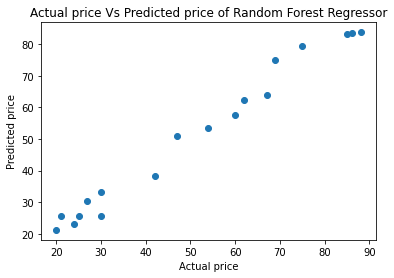

R Square Score of Random Forest Regressor: 0.9450056188654389
Accuracy of RFR : 94.50056188654389
mean absolute error of Random Forest Regressor:  5.5265
mean squared error of Random Forest Regressor is:  42.170589321428565
Root mean squared error of Random Forest Regressor is:  6.493888613260053


In [59]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)
print("R Square Score of Random Forest Regressor:",r2_score(y_train,y_rf_pred))
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)
rf_accuracy = r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

In [62]:
##Regularization using Lasso:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)
#best alpha parameter
alpha = lasscv.alpha_
alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9722472262843371

In [63]:
##Regularization Using Ridge:
from array import array
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridge_alpha= ridgecv.alpha_
ridge_alpha
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.9722108850368859

R Square Score of Random Forest Regressor: 0.9959200161352171


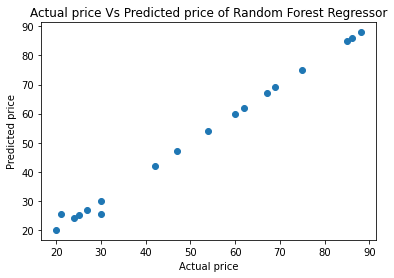

R Square Score of Random Forest Regressor: 0.9332015991929739
Accuracy of RFR : 93.32015991929738
mean absolute error of Random Forest Regressor:  6.539584585667478
mean squared error of Random Forest Regressor is:  51.22210432496326
Root mean squared error of Random Forest Regressor is:  7.156961947989053


In [77]:
from sklearn.ensemble import  GradientBoostingRegressor
#Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)
print("R Square Score of Random Forest Regressor:",r2_score(y_train,y_gbr_pred))
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)
gbr_accuracy = r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Random Forest Regressor:",gbr_accuracy)
print('Accuracy of RFR :',gbr_accuracy*100)
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

In [ ]:
It can be seen that among the two regressors used Random_forest_regressor has the higer accuracy of 

In [80]:
from sklearn.model_selection import cross_val_score
####checking for linear regression
scr=cross_val_score(ln,x,y,cv=5)
print("cross validation score of LinearRegression model :",scr.mean())
####checking for ranndom forest regressor
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random_forest_regressor model :",scr.mean())
####Checking for grandient__boosting_regressor
scr=cross_val_score(gbr,x,y,cv=5)
print("cross validation score of Random_forest_regressor model :",scr.mean())

cross validation score of LinearRegression model : 0.9180771341891049
cross validation score of Random_forest_regressor model : 0.8964483133815747
cross validation score of Random_forest_regressor model : 0.8620973056274934


    predicted_values  orignal_values
15         88.672009              95
20         29.018054              30
23         69.428798              76
22         39.601820              35
14         13.623485              17
12         46.336944              41
8          82.899045              81


In [70]:
x_new=[[9.25]]

In [73]:
ln.predict(x_new)
print(ln.predict(x_new))

[271.45567406]


In [74]:
print(rf.predict(x_new))

[83.81]


In [78]:
print(gbr.predict(x_new))

[87.97585813]


So of the three models trained 
- linear regressor is giving a very high score of 271.455 and it is not acceptable because the scoring is out of 100 , it can be due to bias,
- Random forest regressor is giving a score of 83.81
- Gradient boosting regressor is giving a score of 87.97


it can be seen from the models trained that the the ensemble techniques of bagging and boosting performm better in comparision to the linear regressor even though it has given a higher acccuracy score.

In [84]:
import joblib
joblib.dump(gbr,'gbr_score.obj')###saving the gbr model

['gbr_score.obj']